# **WORLD'S HAPPINESS REPORT**


---




## **Problem Description**
In real data science work, We rarely have clean datasets to work on. We might need to gather the datasets from different sources and then select, transform data to answer further analytical questions. 

However, this data cleaning or data wrangling process is time consuming. Some time it might cause more than 80% of our time and only leave 20% of time to do data analysis.  So, does is the data cleaning worth our time and effort?

Data cleaning does consume so much time and so little to show for our hard work. However, is like the foundation of a building. Without the solid foundation, our further analysis will not be reliable. Oppositely, after the data wrangling work done, we can deliver analysis result more quickly and accurately.

In this project, we are going to use World Happiness Report datasets and 3 supplement datasets to do the data wrangling and data analysis. In this project, you will see more than 80% of our work is data wrangling. However, it builds a solid foundation of our project so that we are more confident about the results and conclusion we made in the end. 

Our project has two main parts. 


**Part 1:Happiness Score Over Years.** 


We use 6 annual world happiness report datasets to analyze the trend of happiness score changing from 2015 to 2020

**Part 2:What factors contribute to happiness score?.** 

We use the 2020 world happiness report dataset, 2020 world population dataset, 2020 world alcohol consumption dataset, and 2020 world fertility dataset to analyze what factors contribute to or influence our happiness 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls
!pwd
path = '/content/drive/MyDrive/ColabNotebooks/project/data/'

drive  sample_data
/content




---



---




# ***Part 1: Happiness Score Over Years***

In this report, we will first look at the *'Happiness Score'* over 2015 to 2020 to see if the score has increase or decrease. We, then, will observe datasets from different sources to see which factor has the most impact on the *'Happiness Score'* that may lead to the change.

## **Data Description**



In this section, we will be observing how the global happiness score change between 2015 and 2020.

**Variable Name & Description of Indicator:** 
1. Country name : We show the names of the countries.
2. Regional : Shows which region the country is in.
3. Standard error of Happiness score : Showing the error rate in the ladder score.
4. upperwhisker : upper limit of score.
5. lowerwhisker : lowe limti of score.
6. Logged GDP per capita : is the total monetary or market value of all the finished goods and services produced within a country's borders in a specific time period.
7. Social support : social support scores of countries.
8. Healthy life expectancy : healthy life expectancy of countries.
9. Freedom to make life choices : the freedom of people in that country to choose life.
10. Generosity : Generosity rate of the country.
11. Perceptions of corruption : corruption perceptions in the country..
12. Ladder score in Dystopia : Ladder score in Dystopia of the coutry (Dystopia: alternatively cacotopia or simply anti-utopia) is a community or society that is undesirable or frightening) .
13. Explained by: Log GDP per capita : Explained Log GDP per capita ratio.
14. Explained by: Social support : Explained social support rate.
15. Explained by: Healthy life expectancy : Explained Healthy life expectancy
16. Explained by: Freedom to make life choices : Explained Freedom to make life choices
17. Explained by: Generosity : Explained Generosity
18. Explained by: Perceptions of corruption : Explained Perceptions of corruption.
19. Dystopia + residual : Dystopia + residual total rate.

In [ ]:
df_2015 = pd.read_csv(path+"2015.csv")
df_2016 = pd.read_csv(path+"2016.csv")
df_2017 = pd.read_csv(path+"2017.csv")
df_2018 = pd.read_csv(path+"2018.csv")
df_2019 = pd.read_csv(path+"2019.csv")
df_2020 = pd.read_csv(path+"2020.csv")



---



---



## **Data Preparation**

We will be adding a column 'year' for each dataset to distinguish the year of the dataset after combining the data.

In [ ]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

In [ ]:
# to show the last column 'Year' was successfully added to all datasets
data_year = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]
for data in data_year:
  print(data.columns[-1],':', data['Year'][1])

Year : 2015
Year : 2016
Year : 2017
Year : 2018
Year : 2019
Year : 2020


In [ ]:
# list of column names
for data in data_year:
  print(data['Year'][1],':',list(data.columns))

2015 : ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
2016 : ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
2017 : ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year']
2018 : ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
2019 : ['Overall rank', 'Country or region', '

We will be renaming some of the columns in each datasets to synchronize the data names.

In [ ]:
df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank',
                          'Happiness.Score':'Happiness Score',
                          'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                          'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                          'Trust..Government.Corruption.' : 'Trust (Government Corruption)',
                           }, inplace = True)
df_2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Happiness Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'Economy (GDP per Capita)',
                          'Healthy life expectancy' : 'Health (Life Expectancy)',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust (Government Corruption)'
                          }, inplace = True)
df_2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Happiness Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'Economy (GDP per Capita)',
                          'Healthy life expectancy' : 'Health (Life Expectancy)',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust (Government Corruption)'
                          }, inplace = True)
df_2020.rename(columns ={'Explained by: Log GDP per capita' : 'Economy (GDP per Capita)',
                         'Country name':'Country', 
                         'Regional indicator':'Region',
                         'Standard error of ladder score':'Standard Error', 
                         'Logged GDP per capita':'Logged GDPPC',
                         'Social support':'Family', 
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)','Ladder score' : 'Happiness Score'
                          },inplace=True)

### ***World Happiness Report 2015***

In [ ]:
display(df_2015.head(),df_2015.info(), df_2015.describe())
print('\n', list(df_2015))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


None

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0



 ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']


In [ ]:
# Use Year 2015 columns in our analysis and insert another column for year. 

df_2015_data = df_2015[['Happiness Rank', 'Country', 'Region','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 
                        'Happiness Score' ]]

In [ ]:
df_2015_data['Year'] =2015

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### ***World Happiness Report 2016***

In [ ]:
display(df_2016.head(),df_2016.info(), df_2016.describe())
print('\n', list(df_2016))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


None

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,2016.0
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220,0.0
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890,2016.0
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710,2016.0
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740,2016.0
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650,2016.0
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720,2016.0



 ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']


In [ ]:
# Use Year 2016 columns in our analysis and inserted another column for year. 

df_2016_data = df_2016[['Happiness Rank','Country', 'Region','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score']]

In [ ]:
df_2016_data['Year'] =2016

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### ***World Happiness Report 2017***

In [ ]:
display(df_2017.head(),df_2017.info(), df_2017.describe())
print('\n', list(df_2017))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy (GDP per Capita)       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health (Life Expectancy)       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust (Government Corruption)  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


None

,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual,Year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238,2017.0
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028,0.0
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,2017.0
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291,2017.0
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910,2017.0
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654,2017.0
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,2017.0



 ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high', 'Whisker.low', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia.Residual', 'Year']


In [ ]:
# Use Year 2017 columns in our analysis and inserted another column for year. 

df_2017_data = df_2017[['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score']]

In [ ]:
df_2017_data['Year'] =2017

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### ***World Happiness Report 2018***

In [ ]:
display(df_2018.head(),df_2018.info(), df_2018.describe())
print('\n', list(df_2018))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Family                         156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Year                           156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


None

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.0
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000,2018.0
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492,0.0
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000,2018.0
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000,2018.0
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000,2018.0
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000,2018.0



 ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year']


In [ ]:
# Use Year 2018 columns in our analysis and insert another column for year. 

df_2018_data = df_2018[['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score']]

In [ ]:
df_2018_data['Year'] =2018

### ***World Happiness Report 2019***

In [ ]:
display(df_2019.head(),df_2019.info(), df_2019.describe())
print('\n', list(df_2019))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Family                         156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
 9   Year                           156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


None

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,2019.0
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,0.0
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,2019.0
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,2019.0
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,2019.0
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,2019.0



 ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year']


In [ ]:
# Use Year 2019 columns in our analysis and insert another column for year. 

df_2019_data = df_2019[['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score']]

In [ ]:
df_2019_data['Year'] =2019

### ***World Happiness Report 2020***

In [ ]:
display(df_2020.head(),df_2020.info(), df_2020.describe())
print('\n', list(df_2020))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     153 non-null    object 
 1   Region                                      153 non-null    object 
 2   Happiness Score                             153 non-null    float64
 3   Standard Error                              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDPPC                                153 non-null    float64
 7   Family                                      153 non-null    float64
 8   Health (Life Expectancy)                    153 non-null    float64
 9   Freedom                                     153 non-null    float64
 10  Generosity    

,Country,Region,Happiness Score,Standard Error,upperwhisker,lowerwhisker,Logged GDPPC,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Ladder score in Dystopia,Economy (GDP per Capita),Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020


None

,Happiness Score,Standard Error,upperwhisker,lowerwhisker,Logged GDPPC,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Ladder score in Dystopia,Economy (GDP per Capita),Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317,2020.0
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638,0.0
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241,2020.0
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928,2020.0
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272,2020.0
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267,2020.0
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810,2020.0



 ['Country', 'Region', 'Happiness Score', 'Standard Error', 'upperwhisker', 'lowerwhisker', 'Logged GDPPC', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Ladder score in Dystopia', 'Economy (GDP per Capita)', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual', 'Year']


In [ ]:
df_2020['Happiness Rank'] = np.arange(153)

In [ ]:
df_2020_data = df_2020[['Happiness Rank','Country','Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity',
                        'Happiness Score']]

In [ ]:
df_2020_data['Year'] =2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print('Rows and columns in 2015: {} \n Rows and columns in 2016: {} \n Rows and columns in 2017: {} \n Rows and columns in 2018: {} \n Rows and columns in 2019: {} \n Rows and columns in 2020: {} \n'.format(df_2015_data.shape,df_2016_data.shape,df_2017_data.shape,df_2018_data.shape,df_2019_data.shape,df_2020_data.shape))

Rows and columns in 2015: (158, 11) 
 Rows and columns in 2016: (157, 11) 
 Rows and columns in 2017: (155, 10) 
 Rows and columns in 2018: (156, 10) 
 Rows and columns in 2019: (156, 10) 
 Rows and columns in 2020: (153, 10) 





---


## **Combine the Datasets**



Inner join will be use for combining the datasets using the *'Country'* column, so we will have unqiue number of *'Country'* values.


In [ ]:
df_2017_data = df_2017_data.merge(df_2016_data,on = 'Country', how = 'inner')
df_2018_data = df_2018_data.merge(df_2016_data,on = 'Country', how = 'inner')
df_2019_data = df_2019_data.merge(df_2015_data,on = 'Country', how = 'inner')
df_2020_data = df_2020_data.merge(df_2015_data,on = 'Country', how = 'inner')

In [ ]:
print (df_2017_data.columns)
print (df_2018_data.columns)
print (df_2019_data.columns)
print (df_2020_data.columns)

Index(['Happiness Rank_x', 'Country', 'Economy (GDP per Capita)_x', 'Family_x',
       'Health (Life Expectancy)_x', 'Freedom_x',
       'Trust (Government Corruption)_x', 'Generosity_x', 'Happiness Score_x',
       'Year_x', 'Happiness Rank_y', 'Region', 'Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y',
       'Year_y'],
      dtype='object')
Index(['Happiness Rank_x', 'Country', 'Economy (GDP per Capita)_x', 'Family_x',
       'Health (Life Expectancy)_x', 'Freedom_x',
       'Trust (Government Corruption)_x', 'Generosity_x', 'Happiness Score_x',
       'Year_x', 'Happiness Rank_y', 'Region', 'Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y',
       'Year_y'],
      dtype='object')
Index(['Happiness Rank_x', 'Country', 'Economy (GDP per Capita)_x'

In [ ]:
df_2017_data.drop(['Year_y', 'Happiness Rank_y','Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'],axis=1,inplace=True)

In [ ]:
df_2018_data.drop(['Year_y','Happiness Rank_y','Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y','Year_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'],axis=1,inplace = True)

In [ ]:
df_2019_data.drop(['Year_y', 'Happiness Rank_y','Economy (GDP per Capita)_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'],axis=1, inplace = True)

In [ ]:
df_2020_data.drop(['Year_y', 'Happiness Rank_y',
       'Family_y', 'Health (Life Expectancy)_y', 'Freedom_y',
       'Trust (Government Corruption)_y', 'Generosity_y', 'Happiness Score_y'],axis=1, inplace = True)

In [ ]:
df_2017_data.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)

In [ ]:
df_2018_data.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)

In [ ]:
df_2019_data.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)

In [ ]:
df_2020_data.rename(columns = {'Year_x' : 'Year',
                          'Happiness Rank_x' : 'Happiness Rank',
                          'Happiness Score_x':'Happiness Score',
                          'Family_x':'Family',
                          'Economy (GDP per Capita)_x':'Economy (GDP per Capita)',
                          'Health (Life Expectancy)_x': 'Health (Life Expectancy)',
                          'Freedom_x' : 'Freedom',
                          'Trust (Government Corruption)_x': 'Trust (Government Corruption)',
                          'Generosity_x':'Generosity'
                          }, inplace = True)

In [ ]:
df_2015_data = df_2015_data[['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank']]
df_2016_data = df_2016_data[['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank']]
df_2017_data = df_2017_data[['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank']]
df_2018_data = df_2018_data[['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank']]
df_2019_data = df_2019_data[['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank']]
df_2020_data = df_2020_data[['Year','Country','Region', 'Economy (GDP per Capita)','Family',
                        'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 
                        'Happiness Score', 'Happiness Rank']]

In [ ]:
# Create dataset including all the data from all the years together.

df_final = pd.concat([df_2015_data,df_2016_data,df_2017_data,df_2018_data,df_2019_data,df_2020_data],
                     sort = False, ignore_index=True)

In [ ]:
df_final

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,7.5870,1
1,2015,Iceland,Western Europe,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,7.5610,2
2,2015,Denmark,Western Europe,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,7.5270,3
3,2015,Norway,Western Europe,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,7.5220,4
4,2015,Canada,North America,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,7.4270,5
...,...,...,...,...,...,...,...,...,...,...,...
907,2020,Tanzania,Sub-Saharan Africa,0.457163,0.688933,57.496075,0.821540,0.619799,0.109669,3.4762,147
908,2020,Central African Republic,Sub-Saharan Africa,0.041072,0.319460,45.200001,0.640881,0.891807,0.082410,3.4759,148
909,2020,Rwanda,Sub-Saharan Africa,0.343243,0.540835,61.098846,0.900589,0.183541,0.055484,3.3123,149
910,2020,Zimbabwe,Sub-Saharan Africa,0.425564,0.763093,55.617260,0.711458,0.810237,-0.072064,3.2992,150


In [ ]:
df_final.columns

Index(['Year', 'Country', 'Region', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Score', 'Happiness Rank'],
      dtype='object')



---



---


## **Missing Data**

In [ ]:
df_final.isna().sum()

Year                             0
Country                          0
Region                           0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Happiness Score                  0
Happiness Rank                   0
dtype: int64

In [ ]:
#identify the NA value

df_final[df_final['Trust (Government Corruption)'].isna()]

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
484,2018,United Arab Emirates,Middle East and Northern Africa,2.096,0.776,0.67,0.284,NaN,0.186,6.774,20


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           912 non-null    int64  
 1   Country                        912 non-null    object 
 2   Region                         912 non-null    object 
 3   Economy (GDP per Capita)       912 non-null    float64
 4   Family                         912 non-null    float64
 5   Health (Life Expectancy)       912 non-null    float64
 6   Freedom                        912 non-null    float64
 7   Trust (Government Corruption)  911 non-null    float64
 8   Generosity                     912 non-null    float64
 9   Happiness Score                912 non-null    float64
 10  Happiness Rank                 912 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 78.5+ KB


We will be replacing the missing value with the mean of all the values from each year for the United Arab Emriates.

In [ ]:
df_missing_fill = df_final[df_final['Country'] == 'United Arab Emirates']
df_missing_fill

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
19,2015,United Arab Emirates,Middle East and Northern Africa,1.427270,1.125750,0.809250,0.641570,0.385830,0.264280,6.9010,20
185,2016,United Arab Emirates,Middle East and Northern Africa,1.573520,0.871140,0.729930,0.562150,0.355610,0.265910,6.5730,28
335,2017,United Arab Emirates,Middle East and Northern Africa,1.626343,1.266410,0.726798,0.608345,0.324490,0.360942,6.6480,21
484,2018,United Arab Emirates,Middle East and Northern Africa,2.096000,0.776000,0.670000,0.284000,NaN,0.186000,6.7740,20
636,2019,United Arab Emirates,Middle East and Northern Africa,1.503000,1.310000,0.825000,0.598000,0.182000,0.262000,6.8250,21
785,2020,United Arab Emirates,Middle East and Northern Africa,1.431086,0.849181,67.082787,0.941346,0.594502,0.123451,6.7908,20


In [ ]:
df_missing_fill['Trust (Government Corruption)'].mean()  #find mean

0.36848635494070736

In [ ]:
# replace the value to mean

df_final.fillna(0.311982, inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           912 non-null    int64  
 1   Country                        912 non-null    object 
 2   Region                         912 non-null    object 
 3   Economy (GDP per Capita)       912 non-null    float64
 4   Family                         912 non-null    float64
 5   Health (Life Expectancy)       912 non-null    float64
 6   Freedom                        912 non-null    float64
 7   Trust (Government Corruption)  912 non-null    float64
 8   Generosity                     912 non-null    float64
 9   Happiness Score                912 non-null    float64
 10  Happiness Rank                 912 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 78.5+ KB


Index(['Year', 'Country', 'Region', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Score', 'Happiness Rank'],
      dtype='object')

<Figure size 2880x2880 with 0 Axes>

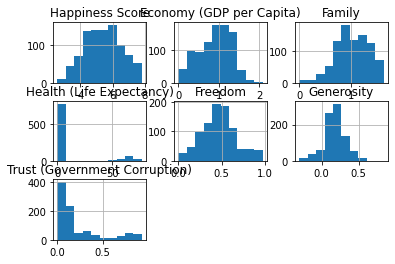

In [ ]:
plt.figure(figsize=(40,40))
df_final[['Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',]].hist();

df_final.columns



---



---


## **Data Analysis**

  We will be analysing the happiness score of countries by region using data visualization. 

###**Happiness Score by Region**

Text(0.5, 1.0, 'Happiness Score by Regions')

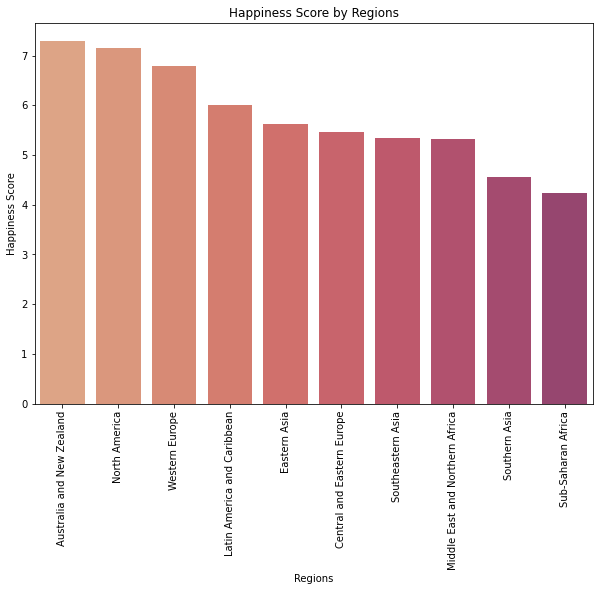

In [ ]:
region_list = list(df_final.Region.unique())
happiness_score_by_region = []
for i in region_list:
    x = df_final[df_final.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    happiness_score_by_region.append(region_happiness_score_rate)

#sorting data and forming a dataframe
df_region = pd.DataFrame({'region_list':region_list, 'happiness_score_by_region':happiness_score_by_region})
new_index = (df_region['happiness_score_by_region'].sort_values(ascending = False)).index.values
sorted_data = df_region.reindex(new_index)
                               
#visualisation
plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['happiness_score_by_region'], palette = sns.color_palette('flare',15))
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Regions')

We can conclude that Australia and New Zealand has highest happiness score ratio. North America and Western Europe has second and third highest happiness scores respectively while the Sub-Saharan Africa region has lowest happiness score ratio.

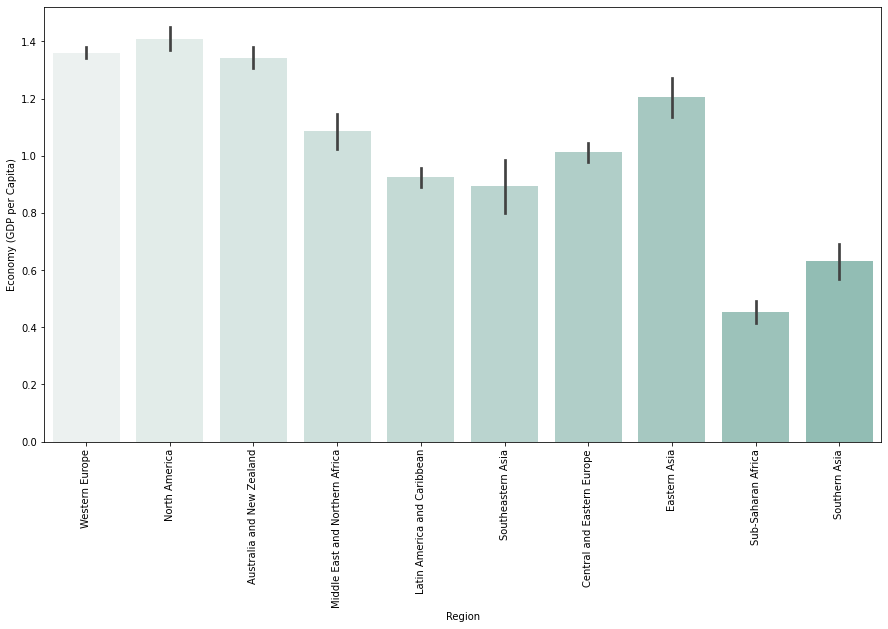

In [ ]:
f,ax1 = plt.subplots(figsize = (15,8))
sns.barplot(x = df_final.Region, y = df_final['Economy (GDP per Capita)'], palette = sns.color_palette("light:#5A9",15))
plt.xticks(rotation = 90)
plt.show()

From above graph which shows distribution of countries in each region by economy, we can see that Western Europe, North America and Australia and New Zealand are among the top regions with high economy. 
We can say that the countries in regions with high economy has high happiness score ratio.


To plot countries with high happiness scores, we filtered countries with happiness scores greater than 6.5.

Text(0.5, 1.0, 'Distribution of the Countries with higher Happiness Index by Region')

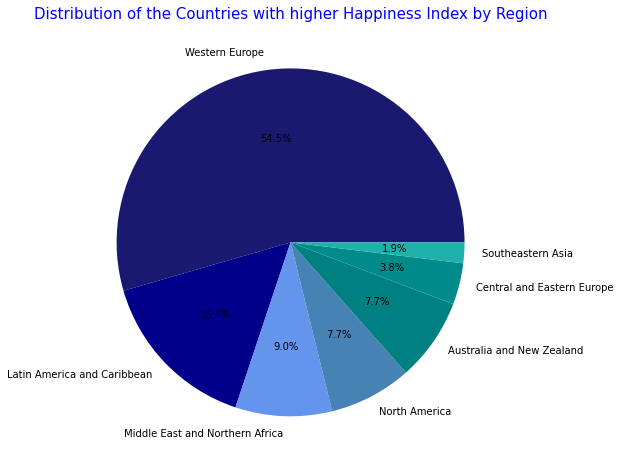

In [ ]:
Filter_Score = df_final['Happiness Score']>=6.5
Filter_countries = df_final[Filter_Score]
Filter_countries.Region.unique()
Filter_countries.Region.value_counts()

#Visualisation
labels = Filter_countries.Region.value_counts().index
colors = ['midnightblue', 'darkblue', 'cornflowerblue','steelblue','teal','darkcyan','lightseagreen']
sizes = Filter_countries.Region.value_counts().values

# visual
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the Countries with higher Happiness Index by Region',color = 'blue',fontsize = 15)

The pie chart explains that Western Europe has highest number of countries with high happiness score while SouthEastern Asia has lowest number of countries with happiness score greater than 6.5.

### **Uni-Variate Plot**

In [ ]:
happiness_score = pd.DataFrame(df_final["Happiness Score"])
happiness_score.describe().round(2)

,Happiness Score
count,912.00
mean,5.41
std,1.12
min,2.57
25%,4.55
50%,5.37
75%,6.22
max,7.81


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



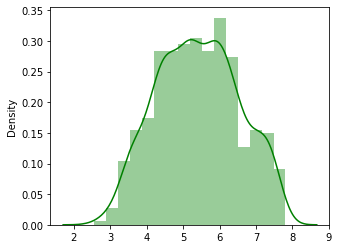

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(happiness_score,kde=True,hist=True,color="g")

classify the Happiness Score into 3 Categories with the help of the Univariate Plots:

1. Unhappy (less than 4)
2. Normal / Likely Happy (between 4 and 6)
3. Happy (more than 6)

In [ ]:
happiness=[]
for i in happiness_score["Happiness Score"]:
    if i<4:
        happiness.append("UNHAPPY")
    elif 4<=i<=6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

# Join our Hapiness_Score dataframe into the main dataframe
happiness_level = pd.DataFrame(happiness,columns=["HAPPINESS_DATA"])
happiness_level = pd.DataFrame(happiness_level["HAPPINESS_DATA"].astype('category'))
df_final = pd.concat([df_final,happiness_level],axis=1)

In [ ]:
df_final["HAPPINESS_DATA"].value_counts()

NORMAL     524
HAPPY      283
UNHAPPY    105
Name: HAPPINESS_DATA, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Countries with happiness score count')

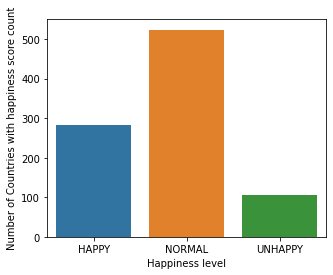

In [ ]:
plt.figure( figsize=(5, 4))
sns.countplot(df_final["HAPPINESS_DATA"])
plt.xlabel("Happiness level")
plt.ylabel("Number of Countries with happiness score count")

The people have happiness score more than 6 are more happy and happiness score between 4 to 6 are likely happy and
happiness score less than 4 are unhappy.
From the plot we can see that likely happy people have more count of people than happy and unhappy

Distribution of all variables on different Happiness Categories

### **Average Happiness Score For Each Year**

In [ ]:
mean_Happiness = df_final.groupby("Year").mean()["Happiness Score"]
mean_Happiness

Year
2015    5.375734
2016    5.382185
2017    5.379520
2018    5.399391
2019    5.433872
2020    5.497306
Name: Happiness Score, dtype: float64

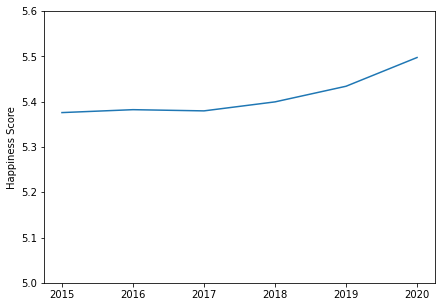

In [ ]:
#with respect to year it shows that happiness score is increasing from 2015 to 2020
plt.figure(figsize=(7,5))
plt.plot(mean_Happiness)
plt.ylabel("Happiness Score")
plt.ylim(5, 5.6)
plt.show()

### **Top 10 Happiness Score**

Text(0.5, 0, 'Happiness Score')

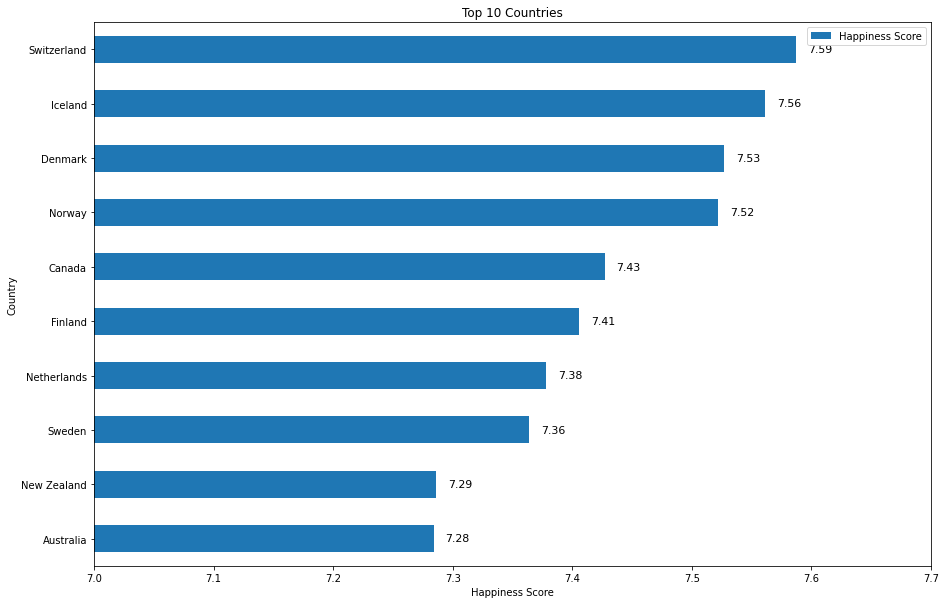

In [ ]:
df_top = df_final.head(10).sort_values('Happiness Score', ascending = True)

#px.bar(df_top, x='Country', y='Happiness Score', title = "Top 10 Countries")
ax = df_top.plot.barh(x='Country', y='Happiness Score', title = "Top 10 Countries", xlim=(7,7.7), figsize=(15,10))
for bar in ax.patches:
     ax.text(bar.get_width()+.01, bar.get_y()+.2, str(round(bar.get_width(), 2)), fontsize=11, color='black')
plt.xlabel('Happiness Score')

Switzerland  is the one of the best country which has highest happiness score.

Why Switzerland is the most happiest country?
Switzerland is famous for its natural beauty with the Swiss Alps, Lake Geneva, the Eiger and the Matterhorn.

Considering the report's suggestion in 2020 that there's a direct link between green spaces and happiness, it makes a lot of sense to see this beautiful nation at number one till 2020.



---



---




# **Part 2: What factors contribute to happiness score?**

##  **Data Description**










From part 1, we know that happiness has increase from 2015 and 2020. In this section we will be exploring datasets from different sources to see which factors has impact on the *'Happiness Score'* in 2020

In this part, we will use 4 different data sources to analyse whether, population, alcohol consumption, fertility level will influnecne people's ahappniess.


**Main dataset:**

•	World happiness dataset 2020

**Supplement dataset :**

•	World population dataset 2020

•	World alcohol consumption dataset 2020

•	World fertility dataset 2020





### ***Main Dataset:***

   

*  **df_happiness_2020** - Hppiness score for 153 countries along with factors  used to explain the score


The purpose of the *World Hapiness Report* is to review the science of measuring and understanding subjective well-being, and to use survey measures of life satisfaction to track the quality of lives as they are lived in more than 100 countries. 

Each *World Happiness Report* focuses on a different theme, and we will be exploring the *World Happiness Report 2020*, which focuses on social, urban and natural environments combine to affect our hapiness.

 **Variable Name & Description of Indicator:** 
1. Country name : We show the names of the countries.
2. Regional : Shows which region the country is in.
3. Standard error of Happiness score : Showing the error rate in the ladder score.
4. upperwhisker : upper limit of score.
5. lowerwhisker : lowe limti of score.
6. Logged GDP per capita : is the total monetary or market value of all the finished goods and services produced within a country's borders in a specific time period.
7. Social support : social support scores of countries.
8. Healthy life expectancy : healthy life expectancy of countries.
9. Freedom to make life choices : the freedom of people in that country to choose life.
10. Generosity : Generosity rate of the country.
11. Perceptions of corruption : corruption perceptions in the country..
12. Ladder score in Dystopia : Ladder score in Dystopia of the coutry (Dystopia: alternatively cacotopia or simply anti-utopia) is a community or society that is undesirable or frightening) .
13. Explained by: Log GDP per capita : Explained Log GDP per capita ratio.
14. Explained by: Social support : Explained social support rate.
15. Explained by: Healthy life expectancy : Explained Healthy life expectancy
16. Explained by: Freedom to make life choices : Explained Freedom to make life choices
17. Explained by: Generosity : Explained Generosity
18. Explained by: Perceptions of corruption : Explained Perceptions of corruption.
19. Dystopia + residual : Dystopia + residual total rate.

In [ ]:
df_happiness_2020 = pd.read_csv(path+'2020.csv')
display(df_happiness_2020.head(),df_happiness_2020.info())
print('\n', list(df_happiness_2020))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


None


 ['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']


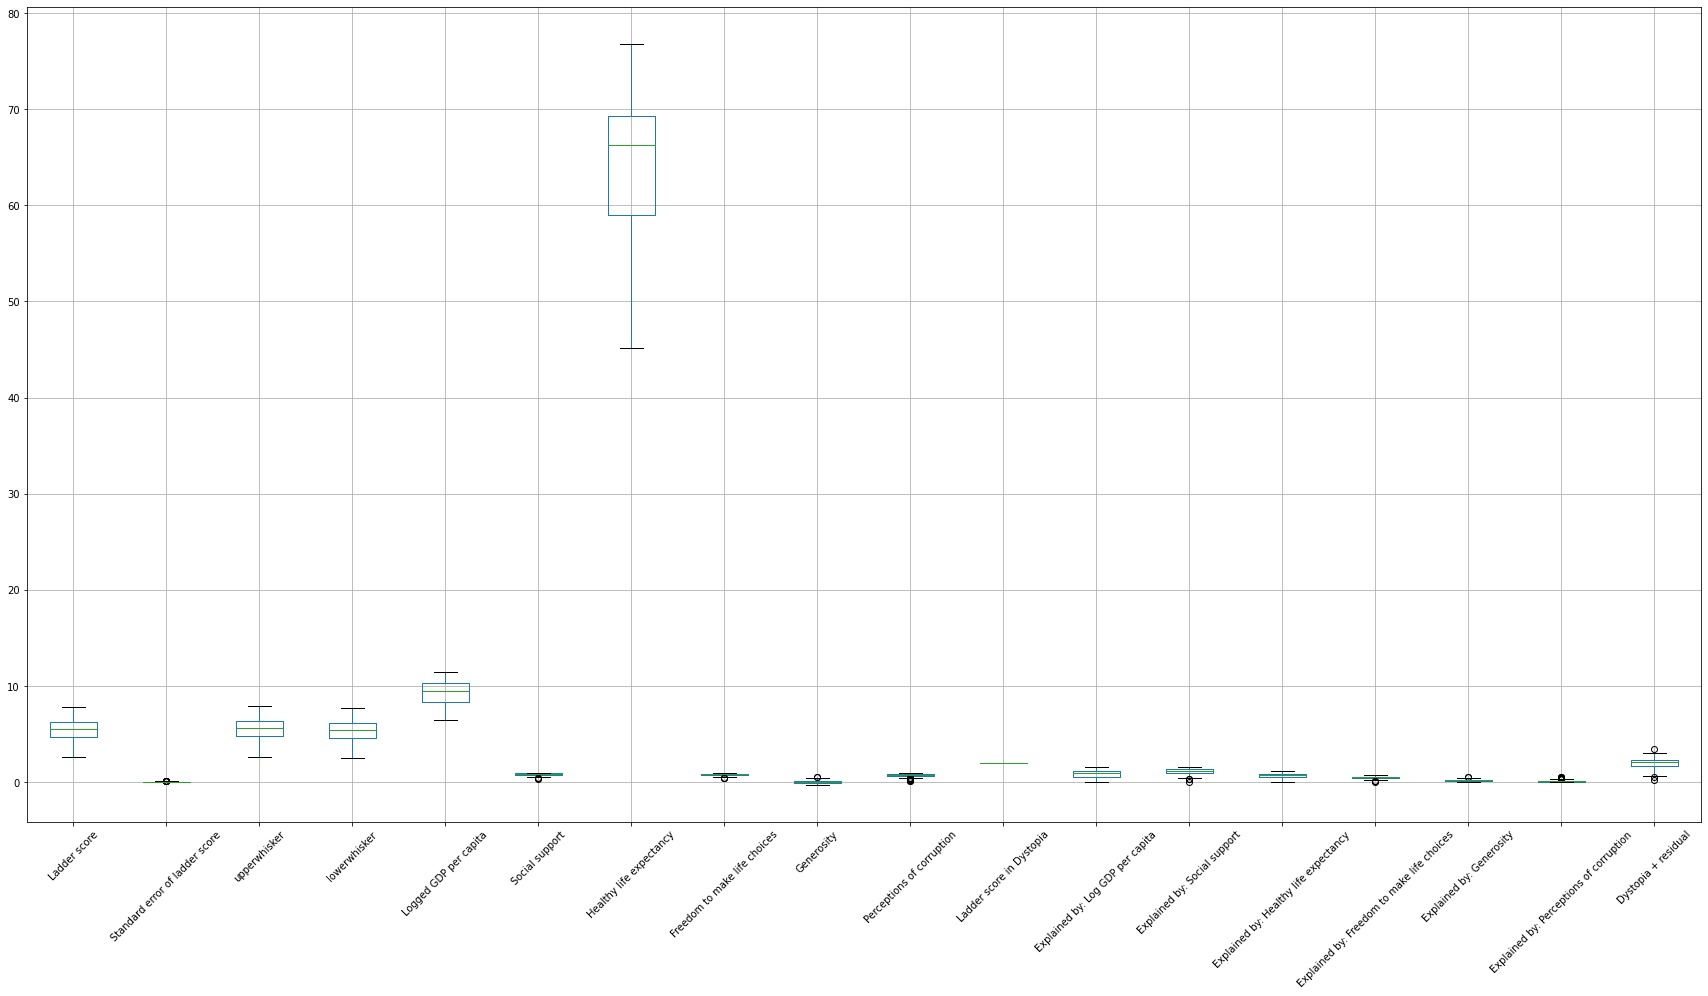

In [ ]:
df_happiness_2020.boxplot(figsize=(30,15),rot=45)


We can see that the *df_happiness_2020* contains the Happiness Score for 153 countries along with different factors used to explain the score. The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.

To check the outliers in giiven dataset plotted the boxplot of all the columns but there is no outliers in the dataset

From this we can see the boxes and whiskers size are different for all columns

So, dispersion is different between the different columns





### ***Supplemental Datasets:***

Along with the *World happniess Report 2020*, we will explore and do exploratory data analysis along with 3 other suppliment datasets from Kaggle that may contribute to a nation's happiness.

Supplemental datasets\:

*  **df_population_2020.csv** - 235 countries' population along with 11 different features in each country
*  **df_alcohol_2020.csv** - alcohol consumption information for 213 countries along with suicde rate and unemployment rate
*  **df_fertility_2020.csv** - the number of children that would be born to a woman over her lifetime for 201 countries

#### **1.   World Population 2020**





**Variable Name & Description of Indicator:** 

1. Country or Dependency : Unique Identifier
2. Population (2020) : Population of different countries
3. Yearly Change : Population change by yearly
4. Net Change : Net change of the population
5. Density (P/Km²) : Density of the population
6. Land Area (Km²) : Land area in terms of kilometer square
7. Migrants (net) : Migrants of the countries
8. Fert. Rate : Fertility or the growth rate of individual countries
9. Med. Age : Median age (Middle Age or the average age) lifespan of the country
10. Urban Pop % : Urban population
11. World Share : Population share in the world

In [ ]:
df_population_2020 = pd.read_csv(path+'population_by_country_2020.csv')
display(df_population_2020.head(),df_population_2020.info(),df_population_2020.describe())
print('\n', list(df_population_2020))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


None

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.322744e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.353034e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.994905e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.460109e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.067170e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000



 ['Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']


In [ ]:
# numbers of missing values in each column
df_population_2020.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

In [ ]:
df_population_2020['Migrants (net)']=df_population_2020['Migrants (net)'].fillna(0)
df_population_2020.isnull().sum()

Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

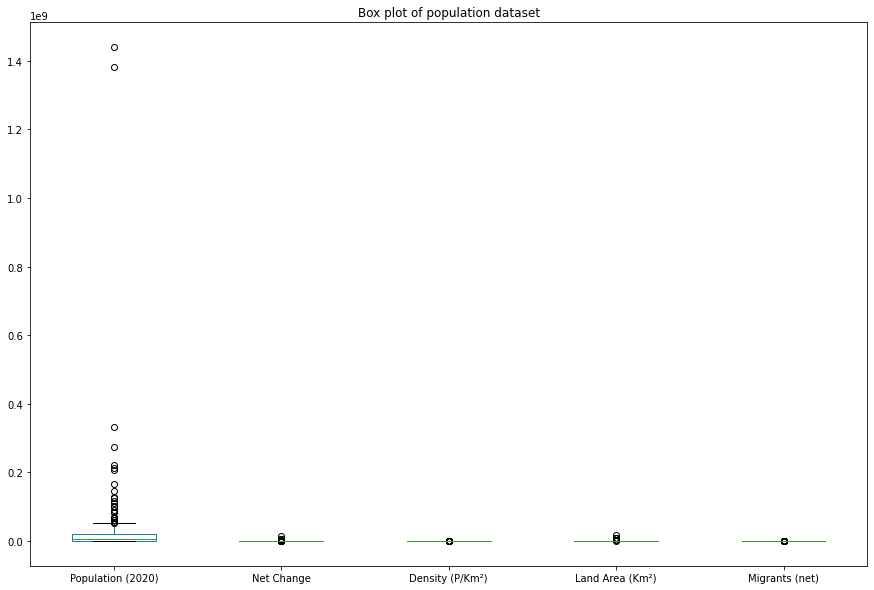

In [ ]:
df_population_2020.plot.box(title='Box plot of population dataset', figsize = (15,10))

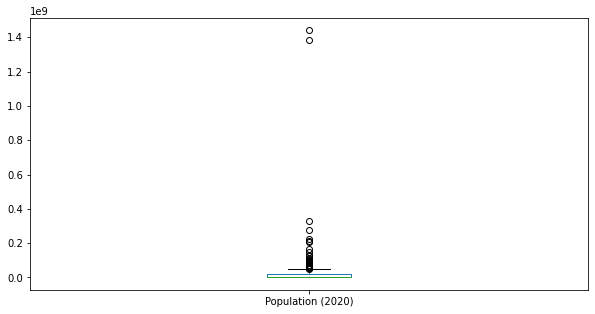

In [ ]:
df_population_2020['Population (2020)'].plot.box(figsize=(10,5))

**Outlier handling:** 
We observed a few outliers for the population of different countries. We are not going to delete these outliers as these outliers represent the population of countries with very large population which ,in fact, could be China and India.
There are outliers for columns 'Net Change' and 'Land Area' which also represent actual data for countries. so, we decided not to delete these outliers.

#### **2.   World Alcohol Consumption 2020**








**Variable Name & Description of Indicator\:**
1. country: Unique Identifier
2. incomeperperson: Gross Domestic Product per capita in constant 2000 US\\$. The inflation but not the differences in the cost of living between countries has been taken into account.
3. alcconsumption: Alcohol consumption per adult (age 15+), litres Recorded and estimated average alcohol consumption, adult (15+) per capita consumption in litres pure alcohol.
4. suicideper100TH: Suicide, age adjusted, per 100 000 Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted
5. employrate: Total employees age 15+ (\% of population) Percentage of total population, age above 15, that has been employed during the given year.
6. urbanrate: Urban population (\% of total) Urban population refers to people living in urban areas as defined by national statistical offices (calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects)

In [ ]:
df_alcohol_2020 = pd.read_csv(path+'alcohol_consumption.csv')
display(df_alcohol_2020.head(),df_alcohol_2020.info(),df_alcohol_2020.describe())
print('\n', list(df_alcohol_2020))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          213 non-null    object 
 1   alcconsumption   187 non-null    float64
 2   incomeperperson  190 non-null    float64
 3   suicideper100th  191 non-null    float64
 4   employrate       178 non-null    float64
 5   urbanrate        203 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.1+ KB


,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


None

,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
count,187.000000,190.000000,191.000000,178.000000,203.000000
mean,6.689412,8740.966076,9.640839,58.635955,56.769360
std,4.899617,14262.809083,6.300178,10.519454,23.844933
min,0.030000,103.775857,0.201449,32.000000,10.400000
25%,2.625000,748.245151,4.988449,51.225000,36.830000
50%,5.920000,2553.496056,8.262893,58.699999,57.940000
75%,9.925000,9379.891166,12.328551,64.975000,74.210000
max,23.010000,105147.437700,35.752872,83.199997,100.000000



 ['country', 'alcconsumption', 'incomeperperson', 'suicideper100th', 'employrate', 'urbanrate']


In [ ]:
# numbers of missing values in each column
df_alcohol_2020.isna().sum().sort_values()

country             0
urbanrate          10
suicideper100th    22
incomeperperson    23
alcconsumption     26
employrate         35
dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



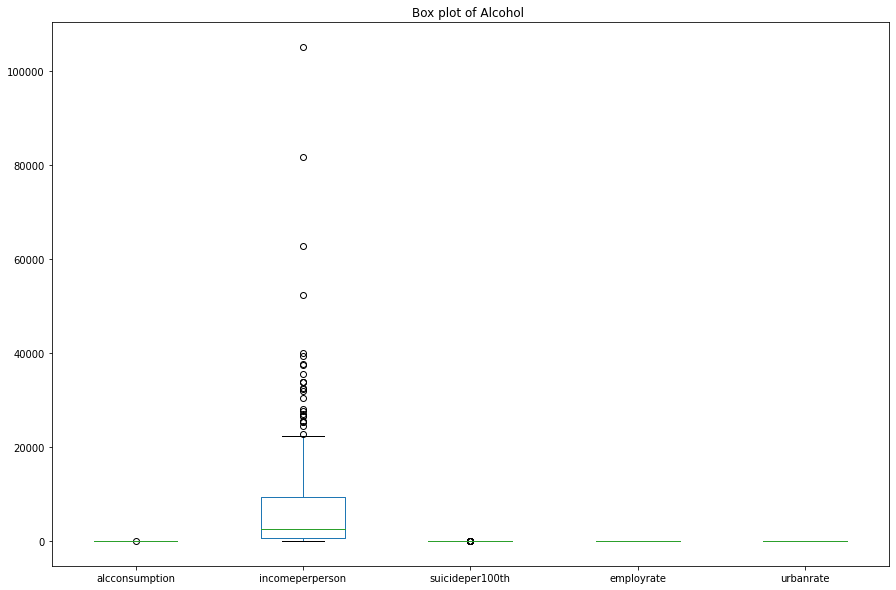

In [ ]:
df_alcohol_2020.plot.box(title='Box plot of Alcohol ', figsize = (15,10))

From the graph above, we can see that the 'income_per_person' variable has many obvious outliers. In our case, we will be keeping the outliers as we know income varies between different job and industries and they should all be taken into consideration for our analysis.

#### **3.   World Fertility 2020**




**Variable Name & Description of Indicator:**
    
*Total fertility rate (TFR)* of a population is the average number of children that would be born to a woman over her lifetime if:


> She was to experience the exact current age-specific fertility rates (ASFRs) through her lifetime, and
She was to survive from childbirth until the end of her reproductive life.




In [ ]:
df_fertility_2020 = pd.read_csv(path+'Fertility.csv')
display(df_fertility_2020.head(),df_fertility_2020.info(),df_fertility_2020.describe())
print('\n', list(df_fertility_2020))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    201 non-null    object 
 1   Fertility  201 non-null    float64
 2   ISO-code   201 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


,Country,Fertility,ISO-code
0,Afghanistan,4.5,AFG
1,Albania,1.6,ALB
2,Algeria,3.0,DZA
3,Andorra,1.3,AND
4,Angola,5.5,AGO


None

,Fertility
count,201.000000
mean,2.650846
std,1.231034
min,1.100000
25%,1.700000
50%,2.200000
75%,3.600000
max,6.100000



 ['Country', 'Fertility', 'ISO-code']


In [ ]:
# check missing data
df_fertility_2020.isnull().sum()  # no missing data

Country      0
Fertility    0
ISO-code     0
dtype: int64

This dataset shows the fertility rate of each country over the world in 2020. There is no missing value in this dataset.



---





## **Data Preperation**




Before combining all datasets and analyse, we will look into each datasets, select and rename necessary columns.

### ***World Happiness Report***

For all factors, we will only consider the following\:

*Ladder score, Logged GDP per capita, Social support, Healthy life expectancy, freedom to make life choices*.

In [ ]:
df_happiness_2020_prep = df_happiness_2020.iloc[:,[0,2,6,7,8,9,10]]

We will be renmaing the selected columns as follow\:

In [ ]:
df_happiness_2020_prep.rename(columns = {'Country name':'Country_name','Ladder score':'Happniess_score','Logged GDP per capita':'Logged_GDP_per_capita','Social support':'Social_support','Healthy life expectancy':'Healthy_life_expectancy','Freedom to make life choices':'Freedom_to_make_life_choices'},inplace = True)
df_happiness_2020_prep

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country_name,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533
...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410
149,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484
150,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064
151,South Sudan,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519


### ***World Population***
For all factors, we will only consider the following\:

*Population(2020), Population Density, Land Area*.

In [ ]:
df_population_2020_prep = df_population_2020.iloc[:,[0,1,4,5]]

We will be renmaing the selected columns as follow\:

In [ ]:
# rename columns
df_population_2020_prep.rename(columns={'Country (or dependency)':'Country_name','Density (P/Km²)':'Population_Density','Land Area (Km²)':'Land_Area(Km²)'},inplace=True)
df_population_2020_prep

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country_name,Population (2020),Population_Density,Land_Area(Km²)
0,China,1440297825,153,9388211
1,India,1382345085,464,2973190
2,United States,331341050,36,9147420
3,Indonesia,274021604,151,1811570
4,Pakistan,221612785,287,770880
...,...,...,...,...
230,Montserrat,4993,50,100
231,Falkland Islands,3497,0,12170
232,Niue,1628,6,260
233,Tokelau,1360,136,10


### ***Alcohol Consumption***

All factors in this dataset will be use and we will be renaming the columns.

In [ ]:
# select all columns
df_alcohol_2020_prep = df_alcohol_2020
# rename columns
df_alcohol_2020_prep.rename(columns={'country':'Country_name','alcconsumption':'alc_consumption','incomeperperson':'income_per_person','suicideper100th':'suicide_per_100th','employrate':'employ_rate','urbanrate':'urban_rate'},inplace=True)
df_alcohol_2020_prep


,Country_name,alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70
...,...,...,...,...,...,...
208,Vietnam,3.91,722.807559,11.653322,71.000000,27.84
209,West Bank and Gaza,NaN,NaN,NaN,32.000000,71.90
210,"Yemen, Rep.",0.20,610.357367,6.265789,39.000000,30.64
211,Zambia,3.56,432.226337,12.019036,61.000000,35.42


### ***World Fertility***

Since we are only looking at fertility rate, only the *'Fertility'* column will be selected and we will be renaming the *'Country'* column to *'Country_name'*.

In [ ]:
# select all columns
df_fertility_2020_prep = df_fertility_2020.iloc[:,0:2]
# rename columns
df_fertility_2020_prep.rename(columns={'Country':'Country_name'},inplace=True)
df_fertility_2020_prep

,Country_name,Fertility
0,Afghanistan,4.5
1,Albania,1.6
2,Algeria,3.0
3,Andorra,1.3
4,Angola,5.5
...,...,...
196,Vietnam,2.0
197,Virgin Islands,2.1
198,Yemen,3.8
199,Zambia,4.6


In [ ]:
# check duplicated country name
df_fertility_2020_prep.duplicated(subset=['Country_name']).sum()

2

In [ ]:
df_fertility_2020_prep[df_fertility_2020_prep.duplicated(['Country_name'])]


,Country_name,Fertility
74,Guinea,4.5
150,Russia,1.6


In [ ]:
df_fertility_2020_prep[df_fertility_2020_prep['Country_name'] == 'Guinea']

,Country_name,Fertility
73,Guinea,4.7
74,Guinea,4.5


In [ ]:
df_fertility_2020_prep[df_fertility_2020_prep['Country_name'] == 'Russia']

,Country_name,Fertility
149,Russia,1.82
150,Russia,1.60


In [ ]:
# drop duplicate rows
df_fertility_2020_prep = df_fertility_2020_prep.drop_duplicates(subset=['Country_name'])
df_fertility_2020_prep

,Country_name,Fertility
0,Afghanistan,4.5
1,Albania,1.6
2,Algeria,3.0
3,Andorra,1.3
4,Angola,5.5
...,...,...
196,Vietnam,2.0
197,Virgin Islands,2.1
198,Yemen,3.8
199,Zambia,4.6



---


## **Combine the datasets**



We will be combining the 4 datasets to do further analyse. 

Before starting the merge, we will verify the combine key *'Country_name'* to make sure each row has a unique value for the *'Country_name'* column.



In [ ]:
def can_serve_as_key(df, col_name):
    number_unique_values = len(df.loc[:,col_name].unique())
    number_rows = df.shape[0]

    if number_unique_values == number_rows:
        print("YES:", number_unique_values, "unique", col_name, "values,", number_rows, "rows", "\n")
    else:
        print("NO:", number_unique_values, "unique", col_name, "values,", number_rows, "rows", "\n")

In [ ]:
can_serve_as_key(df_happiness_2020_prep,'Country_name')

YES: 153 unique Country_name values, 153 rows 



In [ ]:
can_serve_as_key(df_population_2020_prep,'Country_name')

YES: 235 unique Country_name values, 235 rows 



In [ ]:
can_serve_as_key(df_alcohol_2020_prep,'Country_name')

YES: 213 unique Country_name values, 213 rows 



In [ ]:
can_serve_as_key(df_fertility_2020_prep,'Country_name')

YES: 199 unique Country_name values, 199 rows 



From the above results, we observe that each dataset are proven to have unique *'Country_name'* for all rows. 



We can also visulaize the number of *'Country_name'* values (rows) in each datasets.

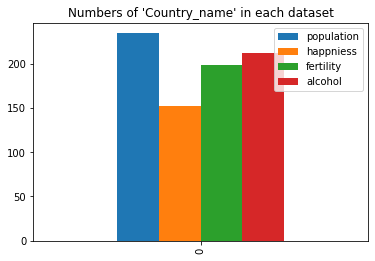

In [ ]:
data_list = [df_population_2020_prep,df_happiness_2020_prep,df_fertility_2020_prep,df_alcohol_2020_prep]
data_name_list = ['population','happniess','fertility','alcohol']
country_count ={}
for i, data in enumerate(data_list):
  country_count[data_name_list[i]] = data['Country_name'].value_counts().sum()
country_df = pd.DataFrame(country_count, index = [0])
country_df.plot.bar(title = "Numbers of 'Country_name' in each dataset")


We will then merge *'World Happiness Report'* with dataframes *'World Population'*, *'Alcohol Consumption'*, and *'World Fertility'*.

we will be inner joinning all the datasets 

In [ ]:
df_combined_2020 = df_happiness_2020_prep
df_combined_2020 = pd.merge(df_combined_2020,df_population_2020_prep, on='Country_name')
df_combined_2020 = pd.merge(df_combined_2020,df_alcohol_2020_prep, on='Country_name')
df_combined_2020 = pd.merge(df_combined_2020,df_fertility_2020_prep, on='Country_name')
display(df_combined_2020.head(),df_combined_2020.info(),df_combined_2020.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country_name                  135 non-null    object 
 1   Happniess_score               135 non-null    float64
 2   Logged_GDP_per_capita         135 non-null    float64
 3   Social_support                135 non-null    float64
 4   Healthy_life_expectancy       135 non-null    float64
 5   Freedom_to_make_life_choices  135 non-null    float64
 6   Generosity                    135 non-null    float64
 7   Population (2020)             135 non-null    int64  
 8   Population_Density            135 non-null    int64  
 9   Land_Area(Km²)                135 non-null    int64  
 10  alc_consumption               133 non-null    float64
 11  income_per_person             132 non-null    float64
 12  suicide_per_100th             134 non-null    float64
 13  emplo

,Country_name,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Population (2020),Population_Density,Land_Area(Km²),alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,5542237,18,303890,13.10,27110.73159,16.234370,57.200001,63.30,1.4
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,5795780,137,42430,12.02,30532.27704,8.973104,63.099998,86.68,1.7
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,8665615,219,39516,11.41,37662.75125,13.239810,64.300003,73.48,1.5
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,341628,3,100250,7.38,33945.31442,11.426181,73.599998,92.26,1.7
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,5428594,15,365268,8.35,39972.35277,10.823000,65.000000,77.48,1.6


None

,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Population (2020),Population_Density,Land_Area(Km²),alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.350000e+02,135.000000,1.350000e+02,133.000000,132.000000,134.000000,133.000000,135.000000,135.000000
mean,5.522194,9.335880,0.815288,64.804680,0.792546,-0.013120,5.429464e+07,232.096296,8.792848e+05,7.107594,7681.110204,9.889506,59.172180,56.750370,2.567556
std,1.106148,1.168356,0.116166,6.615196,0.116940,0.152687,1.755027e+08,766.791842,2.154587e+06,5.123653,10999.966391,6.173366,10.445605,22.848248,1.201573
min,2.566900,6.492642,0.468671,48.003624,0.396573,-0.300907,3.416280e+05,2.000000,3.000000e+02,0.030000,115.305996,0.201449,37.400002,10.400000,1.100000
25%,4.749000,8.453631,0.740405,59.809444,0.720287,-0.126061,5.265376e+06,35.000000,6.269200e+04,2.690000,605.817038,5.850856,51.400002,37.550000,1.650000
50%,5.541500,9.500369,0.838665,66.480164,0.813582,-0.030934,1.194845e+07,84.000000,2.308000e+05,6.970000,2541.779427,8.738894,58.799999,60.140000,2.100000
75%,6.243050,10.263131,0.910313,69.145870,0.887865,0.087815,3.845677e+07,160.000000,7.434610e+05,10.210000,9186.076893,12.755157,64.500000,73.470000,3.200000
max,7.808700,11.450681,0.974670,76.804581,0.974998,0.560664,1.440298e+09,8358.000000,1.637687e+07,23.010000,52301.587180,33.341860,83.199997,100.000000,5.900000




---





##  **Missing Data**

We will be checking the missing data after combining all the datasets.

In [ ]:
missing_counts = df_combined_2020.isna().sum().sort_values()
missing_counts

Country_name                    0
Happniess_score                 0
Logged_GDP_per_capita           0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Population (2020)               0
Population_Density              0
Land_Area(Km²)                  0
urban_rate                      0
Fertility                       0
suicide_per_100th               1
alc_consumption                 2
employ_rate                     2
income_per_person               3
dtype: int64

Since only last four columns have missing value and each column's  missing value is only few, we can replace the missing value for a particular column with the mean value for that column.

In [ ]:
df_combined_2020 = df_combined_2020.fillna(df_combined_2020.mean())
df_combined_2020.isna().sum().sort_values()

Country_name                    0
Happniess_score                 0
Logged_GDP_per_capita           0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Population (2020)               0
Population_Density              0
Land_Area(Km²)                  0
alc_consumption                 0
income_per_person               0
suicide_per_100th               0
employ_rate                     0
urban_rate                      0
Fertility                       0
dtype: int64



---


## **Final Data Conversion**


Now that we have dealt with missing data, and we see that all our data has stored in the right type. We will round off the float type data with less decimals.

In [ ]:
df_combined_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country_name                  135 non-null    object 
 1   Happniess_score               135 non-null    float64
 2   Logged_GDP_per_capita         135 non-null    float64
 3   Social_support                135 non-null    float64
 4   Healthy_life_expectancy       135 non-null    float64
 5   Freedom_to_make_life_choices  135 non-null    float64
 6   Generosity                    135 non-null    float64
 7   Population (2020)             135 non-null    int64  
 8   Population_Density            135 non-null    int64  
 9   Land_Area(Km²)                135 non-null    int64  
 10  alc_consumption               135 non-null    float64
 11  income_per_person             135 non-null    float64
 12  suicide_per_100th             135 non-null    float64
 13  emplo

In [ ]:
df_num = df_combined_2020.select_dtypes(include=[np.float])
df_num

,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,13.10,27110.731590,16.234370,57.200001,63.30,1.4
1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,12.02,30532.277040,8.973104,63.099998,86.68,1.7
2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,11.41,37662.751250,13.239810,64.300003,73.48,1.5
3,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,7.38,33945.314420,11.426181,73.599998,92.26,1.7
4,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,8.35,39972.352770,10.823000,65.000000,77.48,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
130,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,6.97,4189.436587,11.213970,46.000000,59.58,2.9
131,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,7.86,456.385712,12.411181,78.199997,25.52,4.9
132,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,9.99,338.266391,13.117949,79.800003,18.34,4.0
133,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,4.96,320.771890,13.905267,66.800003,37.34,3.6


In [ ]:
integer_cols=['Happniess_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
              'alc_consumption', 'income_per_person', 'suicide_per_100th', 'employ_rate', 'urban_rate', 'Fertility']
df_combined_int=df_combined_2020.copy()
df_combined_int.loc[:,integer_cols] = np.int64(df_combined_int.loc[:,integer_cols])
df_combined_int[integer_cols].head()

,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,7,10,0,71,0,0,13,27110,16,57,63,1
1,7,10,0,72,0,0,12,30532,8,63,86,1
2,7,10,0,74,0,0,11,37662,13,64,73,1
3,7,10,0,73,0,0,7,33945,11,73,92,1
4,7,11,0,73,0,0,8,39972,10,65,77,1


In [ ]:
df_combined_float=df_combined_2020.copy()
for col in integer_cols:
    if ((col == 'Generosity') | (col == 'Freedom_to_make_life_choices') | (col == 'Social_support')):
        df_combined_float[col] = df_combined_float[col].round(3)
    else:
        df_combined_float[col] = df_combined_float[col].round(1)
df_combined_float[integer_cols].head() 

,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,7.8,10.6,0.954,71.9,0.949,-0.059,13.1,27110.7,16.2,57.2,63.3,1.4
1,7.6,10.8,0.956,72.4,0.951,0.066,12.0,30532.3,9.0,63.1,86.7,1.7
2,7.6,11.0,0.943,74.1,0.921,0.106,11.4,37662.8,13.2,64.3,73.5,1.5
3,7.5,10.8,0.975,73.0,0.949,0.247,7.4,33945.3,11.4,73.6,92.3,1.7
4,7.5,11.1,0.952,73.2,0.956,0.135,8.4,39972.4,10.8,65.0,77.5,1.6


In [ ]:
df_combined_float=df_combined_2020.copy()
for col in list(df_combined_float.columns):
    if ((col == 'Population (2020)') | (col == 'Population_Density') | (col == 'Land_Area(Km²)')| (col == 'Country_name')):
        df_combined_float[col] = df_combined_float[col]
    else:
        df_combined_float[col]= df_combined_float[col].round(3)
df_combined_float.head() 

,Country_name,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Population (2020),Population_Density,Land_Area(Km²),alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,Finland,7.809,10.639,0.954,71.901,0.949,-0.059,5542237,18,303890,13.10,27110.732,16.234,57.2,63.30,1.4
1,Denmark,7.646,10.774,0.956,72.403,0.951,0.066,5795780,137,42430,12.02,30532.277,8.973,63.1,86.68,1.7
2,Switzerland,7.560,10.980,0.943,74.102,0.921,0.106,8665615,219,39516,11.41,37662.751,13.240,64.3,73.48,1.5
3,Iceland,7.504,10.773,0.975,73.000,0.949,0.247,341628,3,100250,7.38,33945.314,11.426,73.6,92.26,1.7
4,Norway,7.488,11.088,0.952,73.201,0.956,0.135,5428594,15,365268,8.35,39972.353,10.823,65.0,77.48,1.6


In [ ]:
df_combined_2020 = df_combined_float
df_combined_2020['suicide_per_100th'] = df_combined_2020['suicide_per_100th'].astype(int).round()
df_combined_2020['Fertility'] = df_combined_2020['Fertility'].astype(int).round()

In [ ]:

df_combined_2020.head(5)

,Country_name,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Population (2020),Population_Density,Land_Area(Km²),alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,Finland,7.809,10.639,0.954,71.901,0.949,-0.059,5542237,18,303890,13.10,27110.732,16,57.2,63.30,1
1,Denmark,7.646,10.774,0.956,72.403,0.951,0.066,5795780,137,42430,12.02,30532.277,8,63.1,86.68,1
2,Switzerland,7.560,10.980,0.943,74.102,0.921,0.106,8665615,219,39516,11.41,37662.751,13,64.3,73.48,1
3,Iceland,7.504,10.773,0.975,73.000,0.949,0.247,341628,3,100250,7.38,33945.314,11,73.6,92.26,1
4,Norway,7.488,11.088,0.952,73.201,0.956,0.135,5428594,15,365268,8.35,39972.353,10,65.0,77.48,1




---



## **Data Analysis - Correlations and linear Regression**

In this section, we will first look at the correlation relationships between *Happiness Score* and other factors. Also, from the results, we can conclude that which factor(s) have contribute the most or have the most impact on the *Happiness Score*.

### **Find Correlations**

We will find correlations between each factor, and most importantly the correlations between *'Happiness_score'* and other factors.

Before start finding correlations, we need to know that in statistics the correlation coefficient, *r*, is always between +1 and -1. And its values are usually based on the following:

*   **weak** correlation \: 0 < |r| <= 0.3
*   **moderate** correlation\:   0.3 < |r| < 0.7
*   **strong** correlation\:   |r| => 0.7

            
  
                   

In [ ]:
corr_combined_2020 = df_combined_2020.corr()
#filter and sory only the correlation with 'Happiness_score'
corr_happiness_2020 = corr_combined_2020['Happniess_score'].sort_values()
display(corr_combined_2020,corr_happiness_2020)

,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Population (2020),Population_Density,Land_Area(Km²),alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
Happniess_score,1.000000,0.771463,0.774020,0.779419,0.558586,0.090879,-0.122636,0.069454,0.089317,0.357067,0.701148,0.020095,-0.106151,0.658291,-0.662773
Logged_GDP_per_capita,0.771463,1.000000,0.781943,0.838754,0.399390,-0.092896,-0.005060,0.161625,0.139609,0.372536,0.704777,0.121740,-0.365374,0.764542,-0.810994
Social_support,0.774020,0.781943,1.000000,0.728910,0.458318,-0.015116,-0.128619,0.062568,0.116325,0.452358,0.515390,0.203550,-0.251604,0.609510,-0.733766
Healthy_life_expectancy,0.779419,0.838754,0.728910,1.000000,0.428631,-0.069654,-0.020702,0.192341,0.054433,0.343766,0.642550,0.050184,-0.252607,0.664360,-0.846699
Freedom_to_make_life_choices,0.558586,0.399390,0.458318,0.428631,1.000000,0.271750,0.104062,0.145552,0.041376,0.123935,0.372925,0.102146,0.259647,0.178925,-0.398102
Generosity,0.090879,-0.092896,-0.015116,-0.069654,0.271750,1.000000,0.004213,0.090580,-0.018914,-0.213853,0.170372,0.005849,0.373469,-0.156636,0.054248
Population (2020),-0.122636,-0.005060,-0.128619,-0.020702,0.104062,0.004213,1.000000,-0.000452,0.430763,-0.088785,-0.053859,0.145056,0.068052,-0.106431,-0.047434
Population_Density,0.069454,0.161625,0.062568,0.192341,0.145552,0.090580,-0.000452,1.000000,-0.091428,-0.139132,0.198069,0.003031,0.025666,0.150081,-0.099909
Land_Area(Km²),0.089317,0.139609,0.116325,0.054433,0.041376,-0.018914,0.430763,-0.091428,1.000000,0.091051,0.078283,0.160003,0.059357,0.154673,-0.121387
alc_consumption,0.357067,0.372536,0.452358,0.343766,0.123935,-0.213853,-0.088785,-0.139132,0.091051,1.000000,0.274408,0.404353,-0.131993,0.251750,-0.438182


Fertility                      -0.662773
Population (2020)              -0.122636
employ_rate                    -0.106151
suicide_per_100th               0.020095
Population_Density              0.069454
Land_Area(Km²)                  0.089317
Generosity                      0.090879
alc_consumption                 0.357067
Freedom_to_make_life_choices    0.558586
urban_rate                      0.658291
income_per_person               0.701148
Logged_GDP_per_capita           0.771463
Social_support                  0.774020
Healthy_life_expectancy         0.779419
Happniess_score                 1.000000
Name: Happniess_score, dtype: float64

### **Correlations Plots**

We will first plot the heat map for correlation over all the factors, then we will be looking into the correlation relationship with the factor *'Happiness_Score'*.


#### ***Heatmap***

Heatmap for correlations between all factors

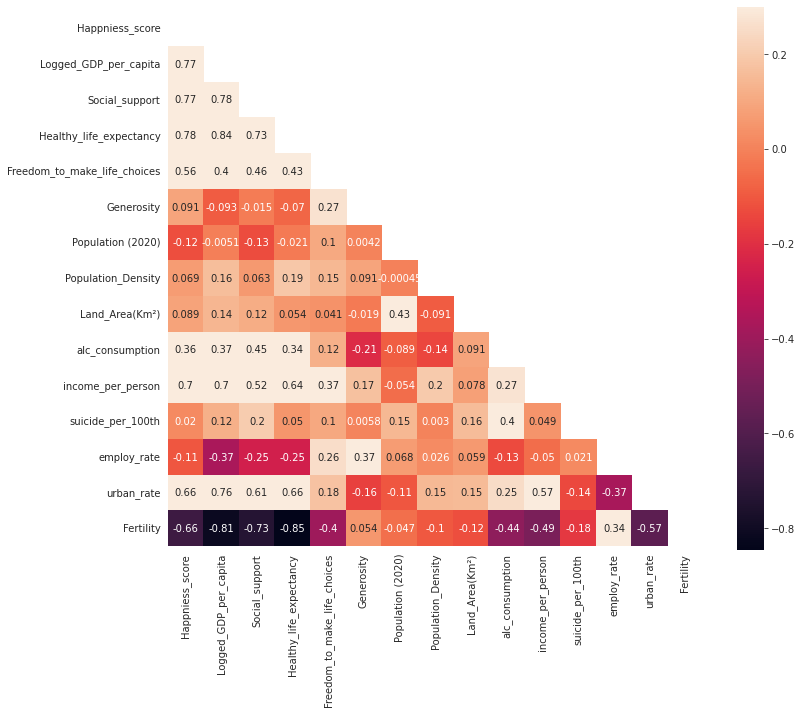

In [ ]:
mask = np.zeros_like(corr_combined_2020)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12,10))
    ax = sns.heatmap(corr_combined_2020, annot=True, mask=mask, vmax=.3, square=True)

plt.show()

#### ***Positive Correlations Plot***

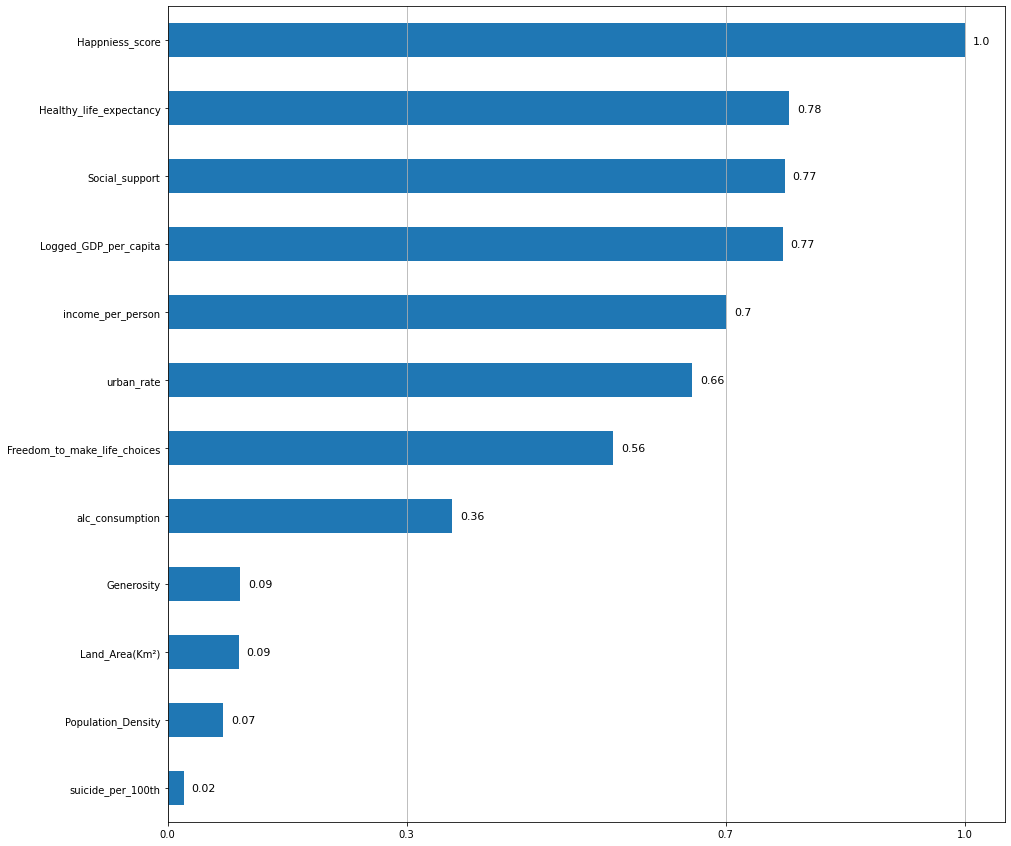

In [ ]:
pos_corr = corr_happiness_2020[corr_happiness_2020>=0]
ax = pos_corr.plot.barh(figsize=(15,15), xticks=[0,0.3,0.7,1])
for bar in ax.patches:
     ax.text(bar.get_width()+.01, bar.get_y()+.2, str(round(bar.get_width(), 2)), fontsize=11, color='black')
plt.grid(axis='x')

#### ***Negative Correlations Plot***

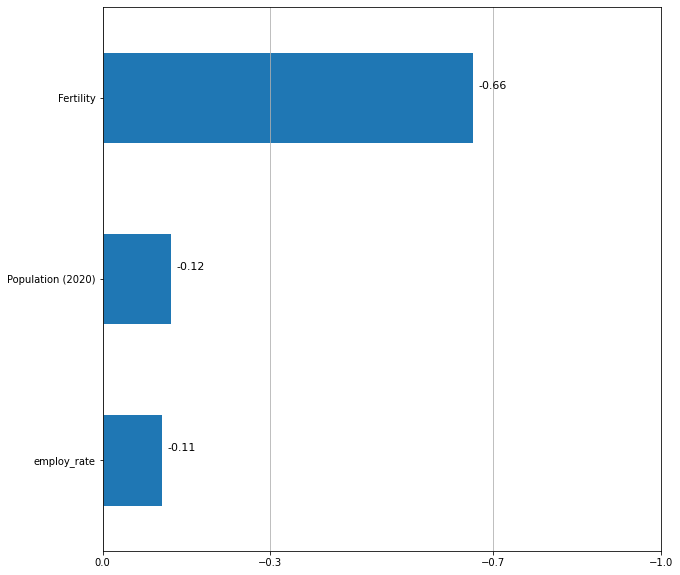

In [ ]:
neg_corr = corr_happiness_2020[corr_happiness_2020<0]
ax = neg_corr.plot.barh(figsize=(10,10), xticks=[0,-0.3,-0.7,-1])
for bar in ax.patches:
     ax.text(bar.get_width()-.01, bar.get_y()+.2, str(round(bar.get_width(), 2)), fontsize=11, color='black')
plt.grid(axis='x')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

### **Correlation Analysis**


From the above correlation plots, we can conclude the following:

1.Happiness score has strong positive correlation with GDP , social  support,healthy life expectancy and income per person 

2.Happiness score has moderate positive correlation with the freedom to make life choices, alcohol comsumption, and urbanrate


3.Happiness score has moderate negative correlation with numbers of children per family have(fertility level)

### **Linear Regression to Predict Happniess Score** 

In [ ]:
df= df_combined_2020

In [ ]:
df.head(5)

,Country_name,Happniess_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Population (2020),Population_Density,Land_Area(Km²),alc_consumption,income_per_person,suicide_per_100th,employ_rate,urban_rate,Fertility
0,Finland,7.809,10.639,0.954,71.901,0.949,-0.059,5542237,18,303890,13.10,27110.732,16,57.2,63.30,1
1,Denmark,7.646,10.774,0.956,72.403,0.951,0.066,5795780,137,42430,12.02,30532.277,8,63.1,86.68,1
2,Switzerland,7.560,10.980,0.943,74.102,0.921,0.106,8665615,219,39516,11.41,37662.751,13,64.3,73.48,1
3,Iceland,7.504,10.773,0.975,73.000,0.949,0.247,341628,3,100250,7.38,33945.314,11,73.6,92.26,1
4,Norway,7.488,11.088,0.952,73.201,0.956,0.135,5428594,15,365268,8.35,39972.353,10,65.0,77.48,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country_name                  135 non-null    object 
 1   Happniess_score               135 non-null    float64
 2   Logged_GDP_per_capita         135 non-null    float64
 3   Social_support                135 non-null    float64
 4   Healthy_life_expectancy       135 non-null    float64
 5   Freedom_to_make_life_choices  135 non-null    float64
 6   Generosity                    135 non-null    float64
 7   Population (2020)             135 non-null    int64  
 8   Population_Density            135 non-null    int64  
 9   Land_Area(Km²)                135 non-null    int64  
 10  alc_consumption               135 non-null    float64
 11  income_per_person             135 non-null    float64
 12  suicide_per_100th             135 non-null    int64  
 13  emplo

In [ ]:
df.columns

Index(['Country_name', 'Happniess_score', 'Logged_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity', 'Population (2020)',
       'Population_Density', 'Land_Area(Km²)', 'alc_consumption',
       'income_per_person', 'suicide_per_100th', 'employ_rate', 'urban_rate',
       'Fertility'],
      dtype='object')

In [ ]:
#Firstly, dropped Country column from dataset as it is categorical data type and linear regression
#only need numerical data type to run linear regression

In [ ]:
df.drop('Country_name',inplace = True,axis='columns')

#### **Training a Linear Regression Model**

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Happiness Score column. We will toss out the Address column because it only has text info that the linear regression model can't use.

In [ ]:
X = df[['Logged_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'income_per_person']]
y = df['Happniess_score']

**Train Test Split**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. We assigned 60% of the dataset to the train set and 40% to a test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Creating and Training the Model**



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)
#A linear regression model is created and trained at (in sklearn, the train is equal to fit).

LinearRegression()

In [ ]:
lm.score(X_train,y_train)
#model is good as score of linear regression is more than 0 

0.7436112839343918

#### ***Model Evaluation***

In [ ]:
# print the intercept
print(lm.intercept_)

-0.54655143586983


We imported sklearn linear regression to create a best fit line for our variables.
So, to make a best fit line need intercept and coefficients/

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Logged_GDP_per_capita,-0.067144
Social_support,4.379316
Healthy_life_expectancy,0.044472
income_per_person,0.000032


To get better visual on coefficients, I used Dataframe.
To check which variable is affection our dependendent variable Happiness score.
By using intercept and coefficients can build linear regression model
Happiness_score = intercept + Logged_gdp_per_capita&*x + Social_support* x^2 +.................

#### ***Predictions from our Model***

Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions = lm.predict(X_test)

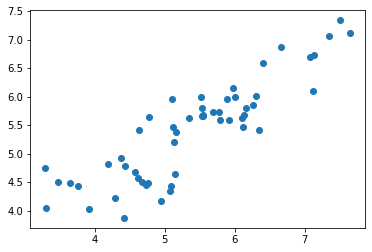

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,predictions)

Our predicted values are very close to the actual values for the observations in the data set. A kind of straight diagonal line with some outliers in this scatterplot would indicate that our model perfectly predicted the y-array values

#### ***Regression Evaluation Metrics***

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.42013890272832083
MSE: 0.2754206361251612
RMSE: 0.5248053316470415


# **CONCLUSION**

**_In part one of our report, we analyzed the change of the Global Happiness Scores over the years between 2015 and 2020. From the results, we observed that \:_**  

*   Out of all the different regions in the world, Australia and New Zealand has the highest Happiness Score of 7.29 and North America with 7.16, where Sub- Saharan Africa has the lowest score of 4.24

*   With the top 10 happiest countries, Switzerland has the highest Happiness Score out of all the selected countries in the world. Canada has ranked the fifth happiest country with the average Happiness Score of 7.43

* By identifying Happiness Score as high if the score is greater or equal to 6.5, Western Europe has the most countries with high happiness Score of 54.5% out of all the High Happiness Score Region

*   Over the 6 years, the average Happiness Score has slowly increase from 5.375 to 5.497



***With the increase Happiness Score over the years, in part 2 of our study, we explored different datasets relating the happiness of a country and compare different factors. We conclude that\:***

* Healthy life expectancy of a country has the strongest positive correlation with Happiness score, where Social support and GDP are also strongly positive correlated with only 0.01 less than Healthy life expectancy. This means that the increase of Health life expectancy, social support or GDP will lead to an increase in Happiness Score.

* Fertility rate has the strongest negative correlation with the Happiness Scores, meaning that if fertility rate decrease, Happiness Score will eventually increase.

* With the linear regression prediction, we have conclude that 'Logged_GDP_per_capita','Social_support', 'Healthy_life_expectancy' and 'income_per_person' variables can be used to predict the 'Happiness Score'.

***With our study over the Global Happiness Scores, it is recommended for a country to focus on more of the strong correlation factors in order to increase a country's Happiness Score.***

